In [1]:
import pandas as pd
import statsmodels.api as sm

from matplotlib import pyplot as plt


plt.rcParams['figure.figsize'] = (10.0, 4.0)



# Данные
Данные получены с сайта [covidwizard](http://covidwizard.com).   
В качестве стран для тестирования моделей были выбраны:
* Россия
* США
* Великобритания
* Германия
* Франция
* Китай
* Индия 
* Бразилия

In [2]:

import sys
import json
import logging

from dataclasses import dataclass
from collections import defaultdict
from tqdm import tqdm
from pathlib import Path


if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")


COUNTRIES = ["All", "Russia", "United States", "United Kingdom", "Germany", "France", "India", "Brazil", "China"]
DEBUG = False

data_path = Path("data")
result_path = Path("results")
result_path.mkdir(exist_ok=True)


def experiment(df, model, end, forecasting_size, country):
    assert df.shape[0] >= end
    
    train = df.iloc[:end-forecasting_size, 0]
    test = df.iloc[end-forecasting_size:end, 0]
    
    model = model(train).fit()
    y_pred = model.forecast(steps=forecasting_size)
    mse = (test.values - y_pred).pow(2).mean()
    
    plt.plot(
        train.index,
        train.values,
        color="black",
        label="train"
    )
    plt.plot(
        test.index,
        test.values,
        color="blue",
        label="ground_true"
    )
    plt.plot(
        test.index,
        y_pred,
        color="green",
        label="predicted"
    )
    plt.title(f"{country} end: {end}")
    plt.legend()

    return mse


def test_all_countries(model):
    for country in tqdm(COUNTRIES[:2]):
        try:
            path = data_path.joinpath(f"{country}.csv")
            df = pd.read_csv(path, index_col=0).sort_index()
            df.index = pd.to_datetime(df.index)
            df.iloc[:, 0] = pd.to_numeric(df.iloc[:, 0], errors="coerce").dropna()

            for end in range(21+config.forecasting_size, df.shape[0] - config.forecasting_size,
                             config.forecasting_size if not DEBUG else 2*config.forecasting_size):
                try:
                    experiment(df, model, end, config.forecasting_size, country)
                    plt.show()

                except Exception as e:
                    logging.warning(e)

        except Exception as e:
            logging.warning(f"Can't make model for {country}.", e)
            break

# Модели
Рассматриваем две модели предсказания временных рядов:

## Простая авторегрессионная модель
**описание с формулками**

## SARIMAX
**описание с формулками**


# Autoregression model

  0%|          | 0/2 [00:00<?, ?it/s]

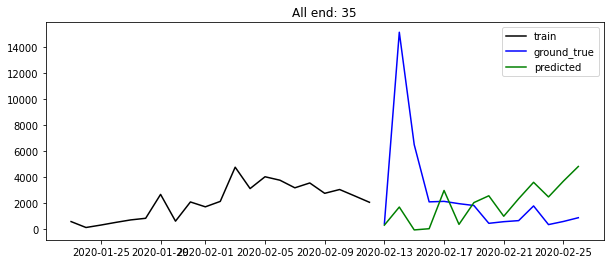

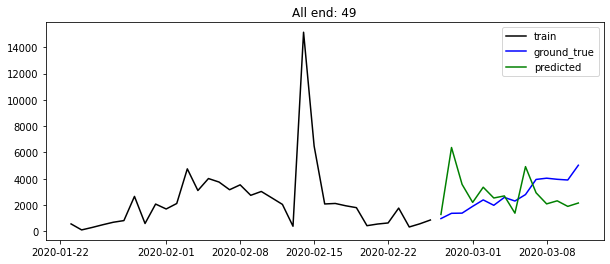

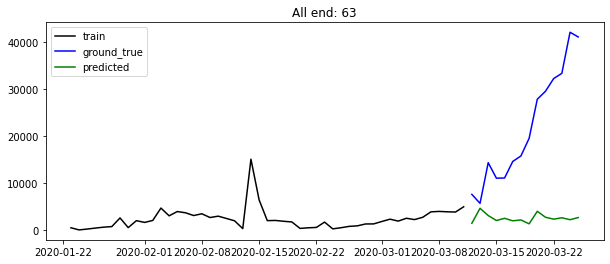

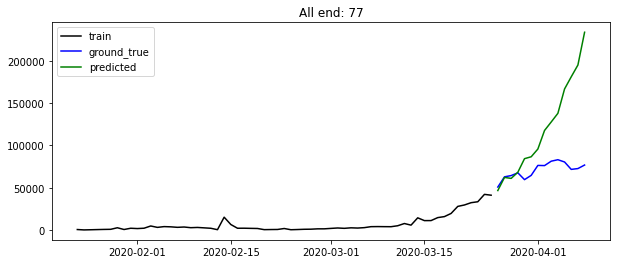

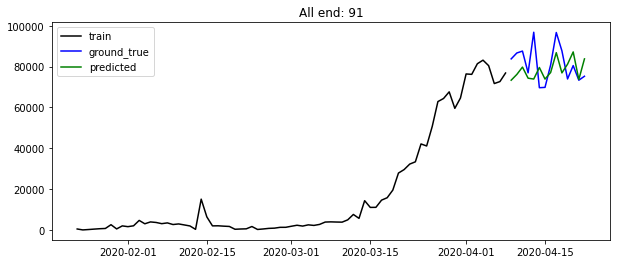

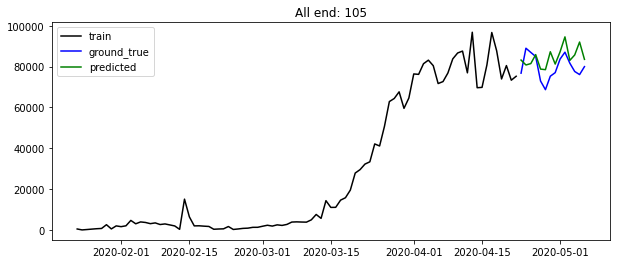

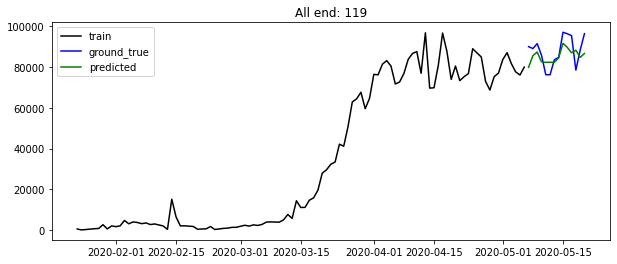

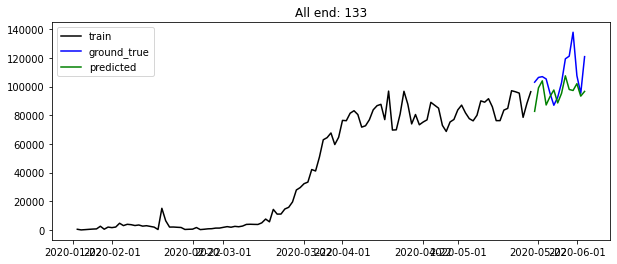

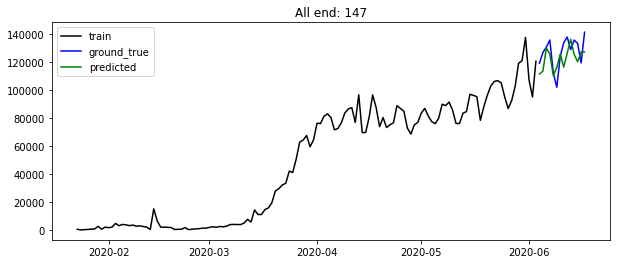

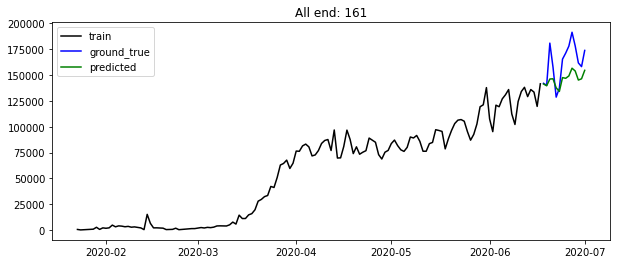

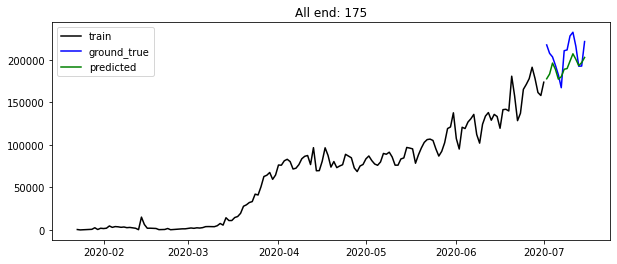

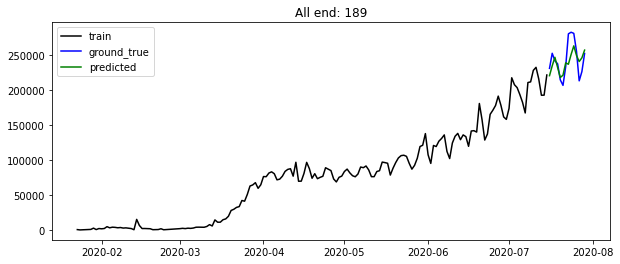

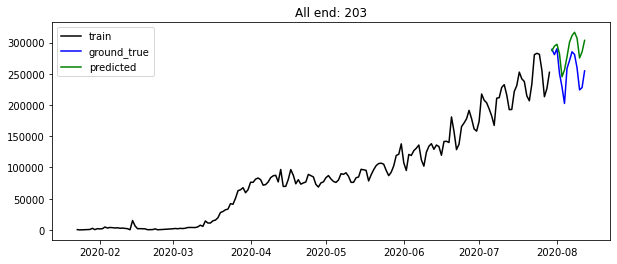

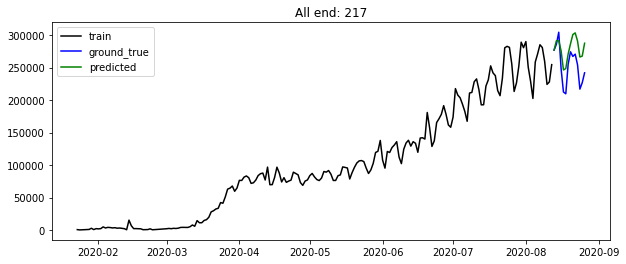

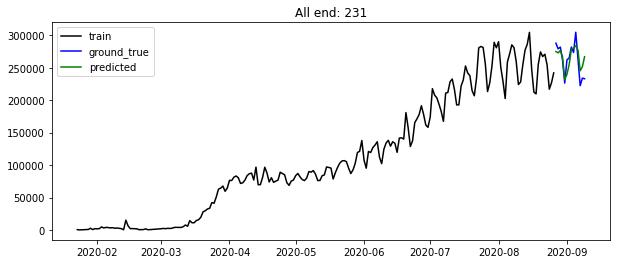

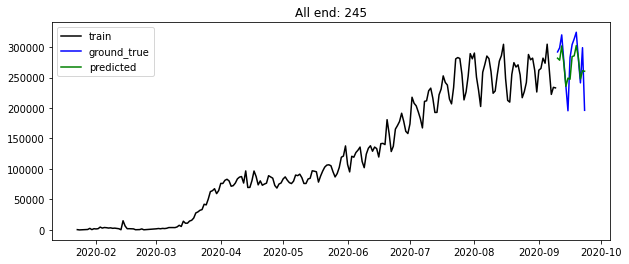

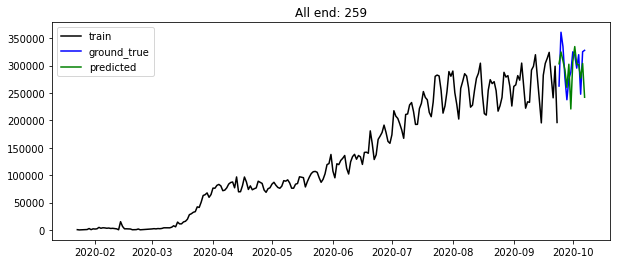

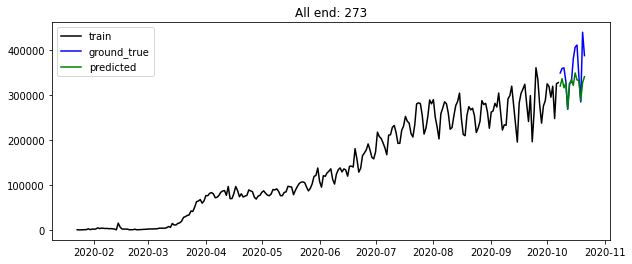

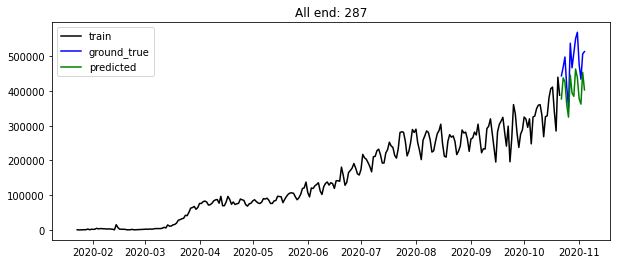

 50%|█████     | 1/2 [00:03<00:03,  3.56s/it]

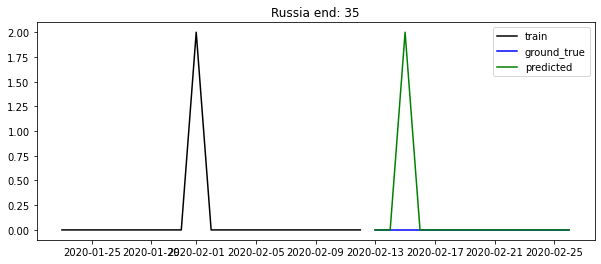

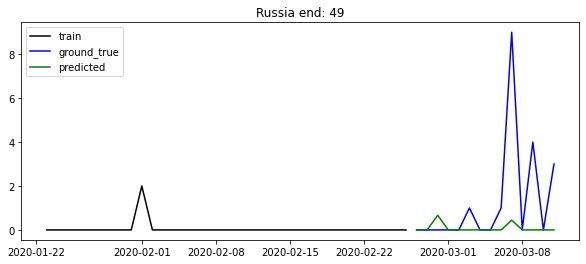

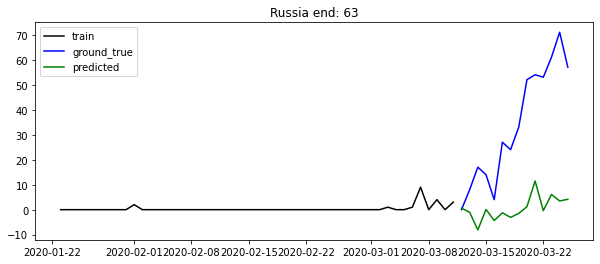

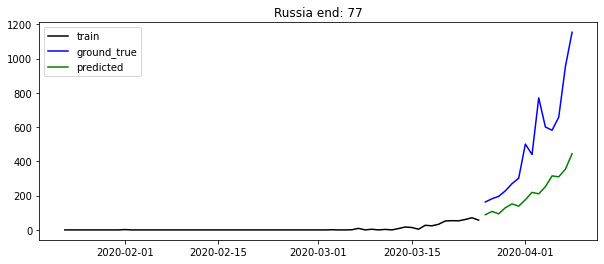

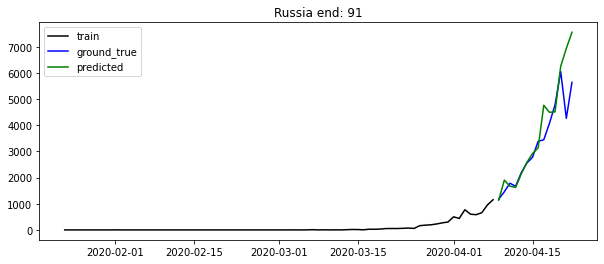

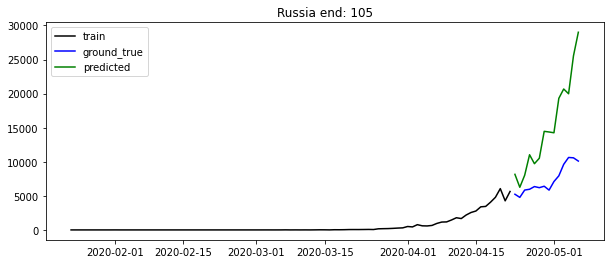

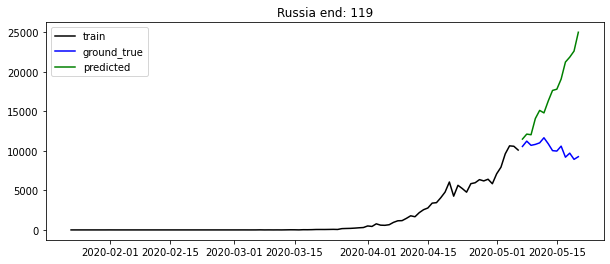

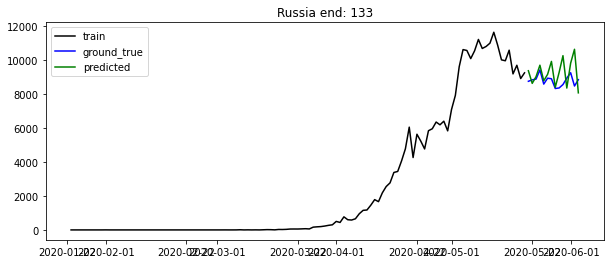

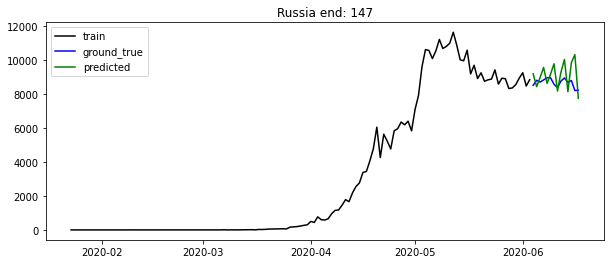

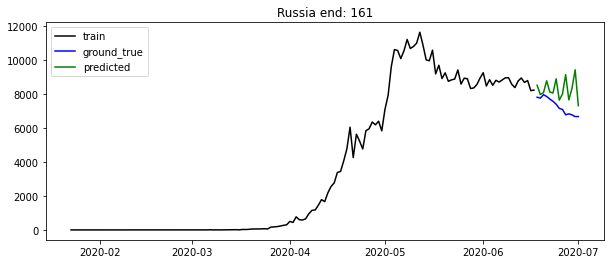

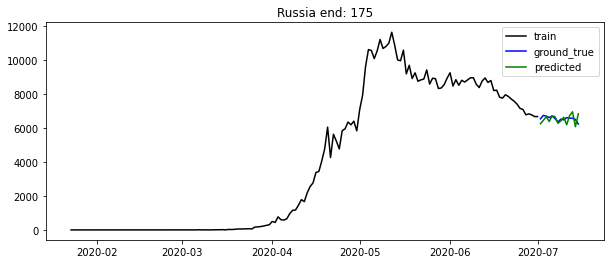

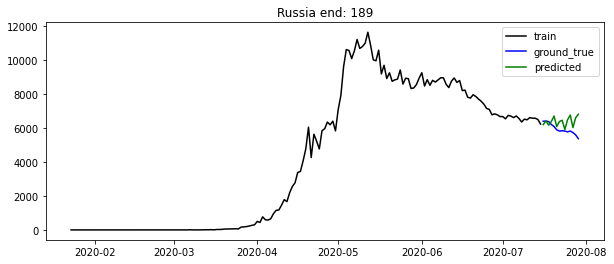

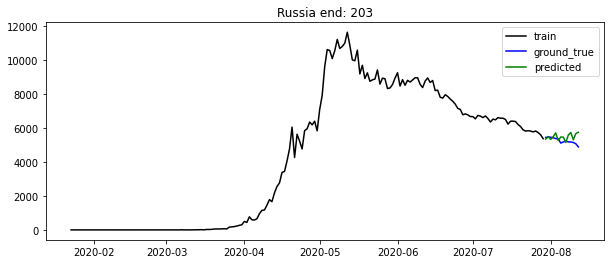

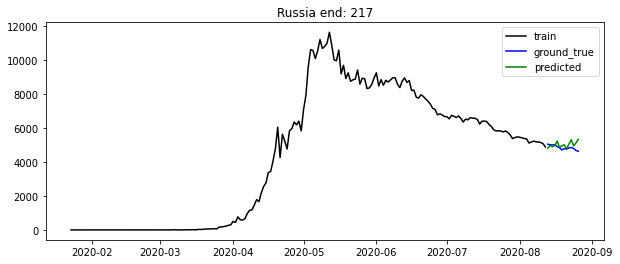

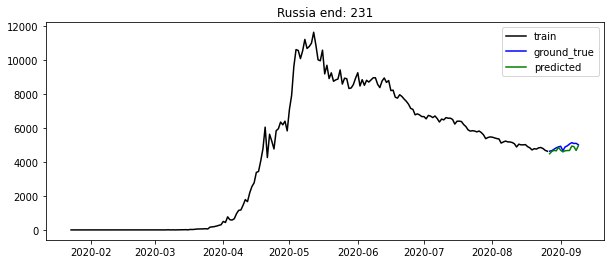

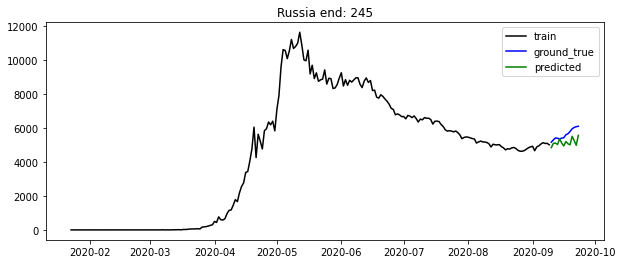

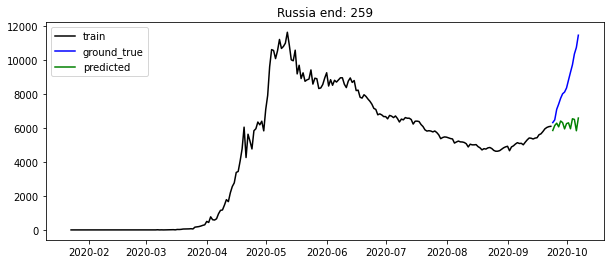

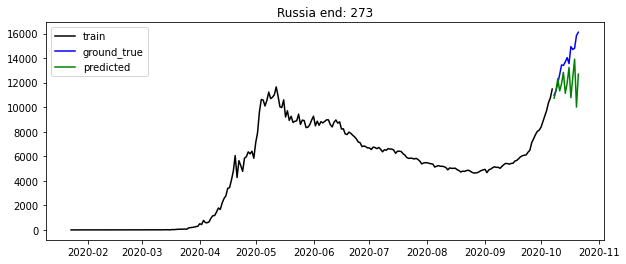

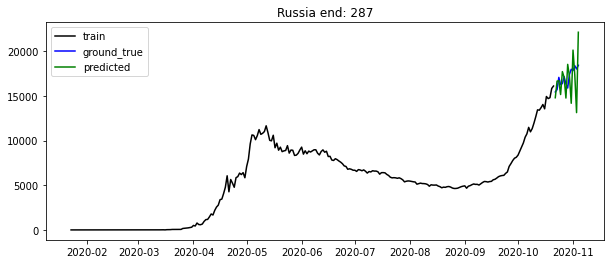

100%|██████████| 2/2 [00:06<00:00,  3.25s/it]


In [3]:
@dataclass
class ArConfig:
    lags = (3, 7)
    seasonal = True
    period = 7
    forecasting_size = 14
    
config = ArConfig()
model = lambda x:\
    sm.tsa.AutoReg(x, lags=config.lags, seasonal=config.seasonal, period=config.period)

test_all_countries(model)

# SARIMAX

  0%|          | 0/2 [00:00<?, ?it/s]

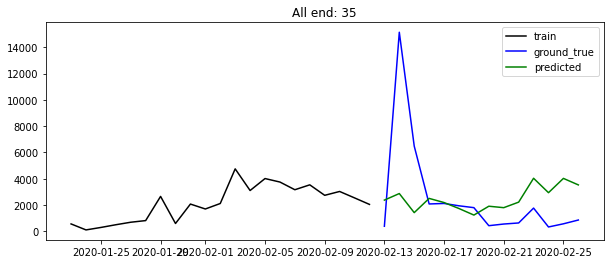

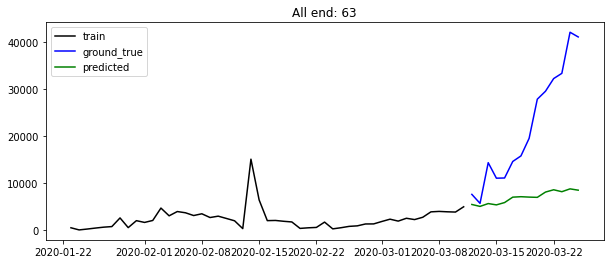

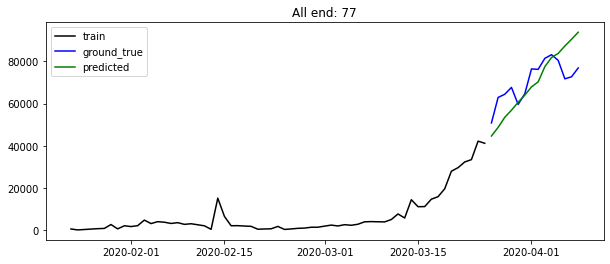

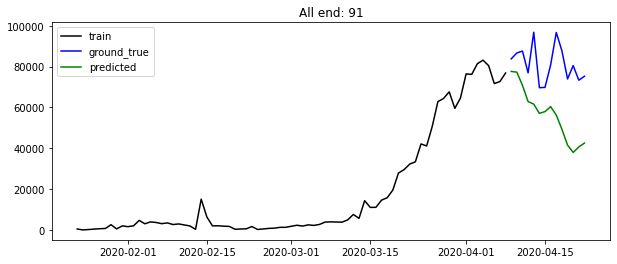

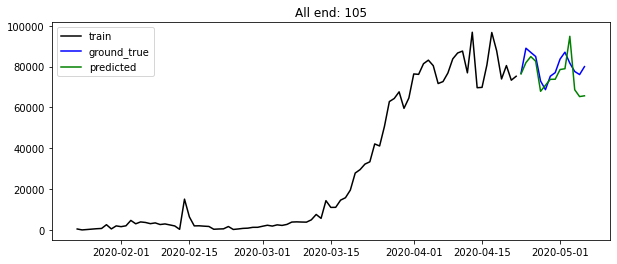

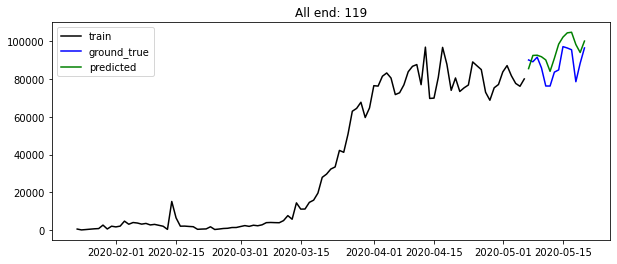

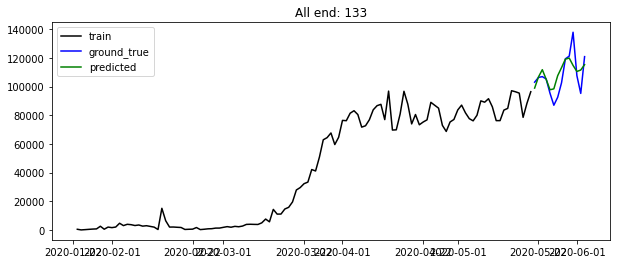

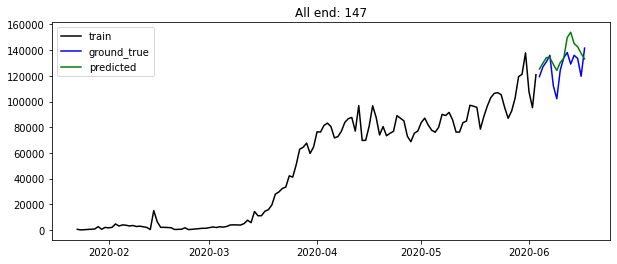

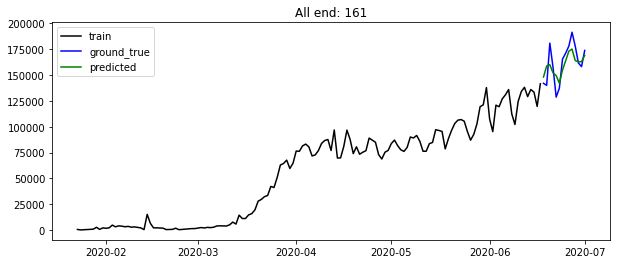

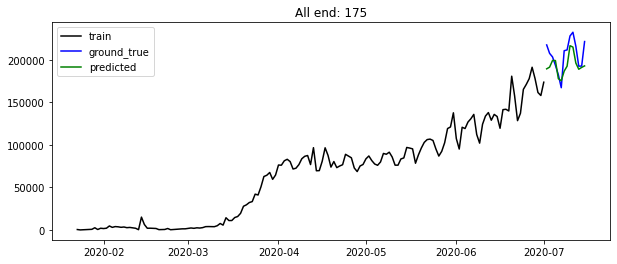

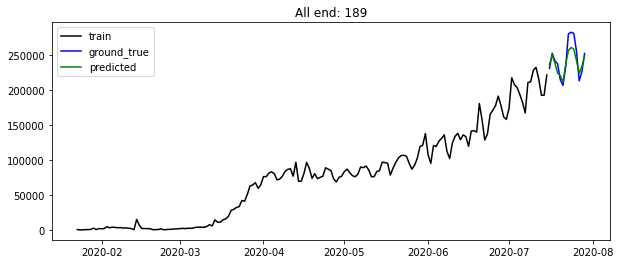

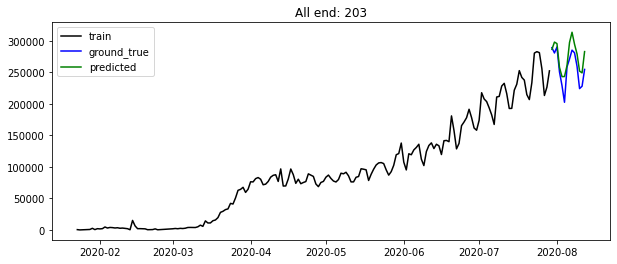

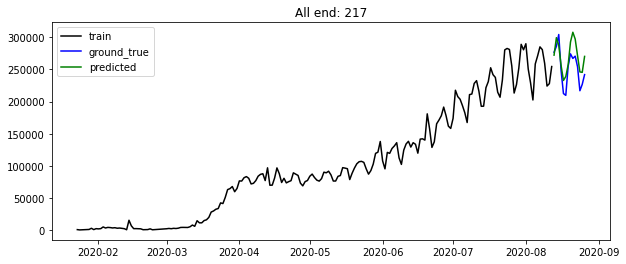

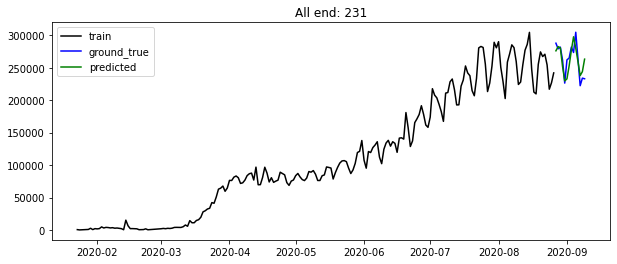

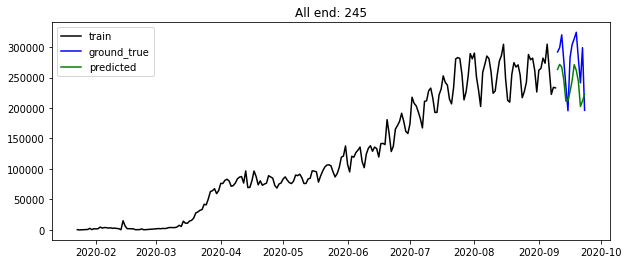

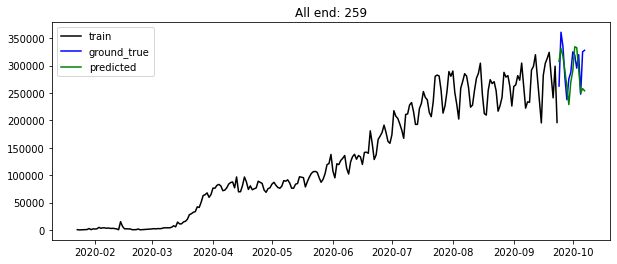

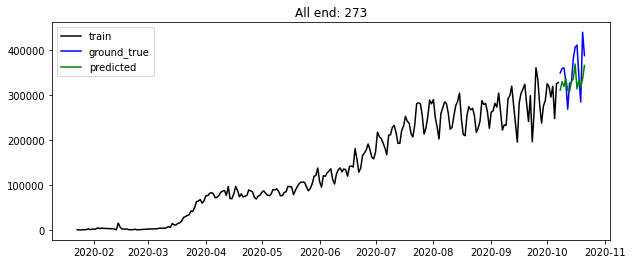

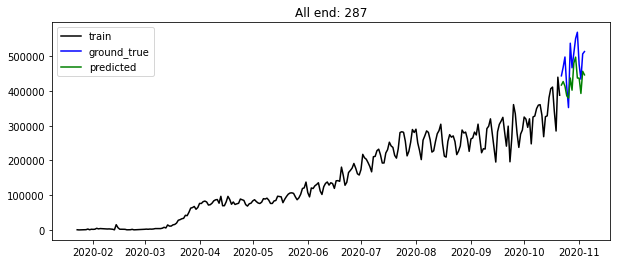

 50%|█████     | 1/2 [00:58<00:58, 58.10s/it]

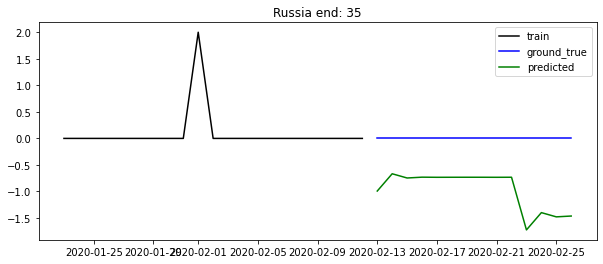

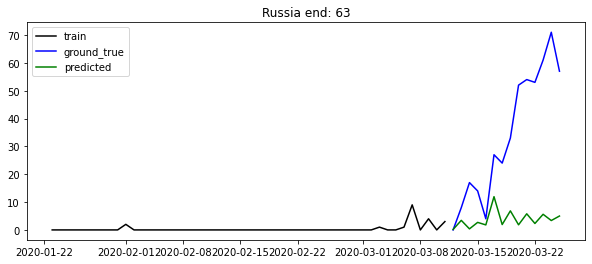

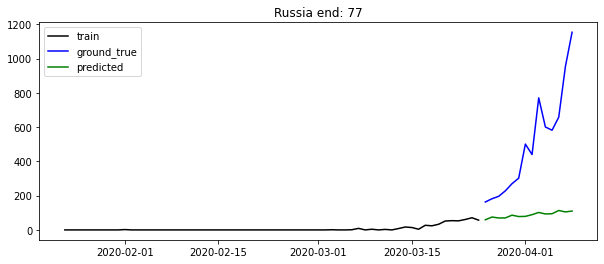

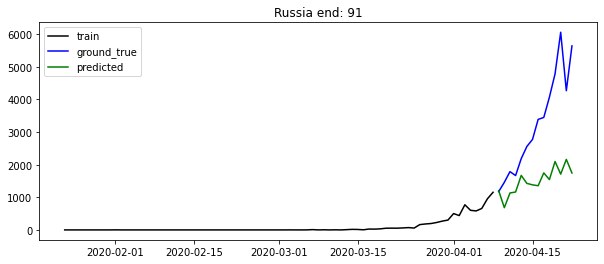

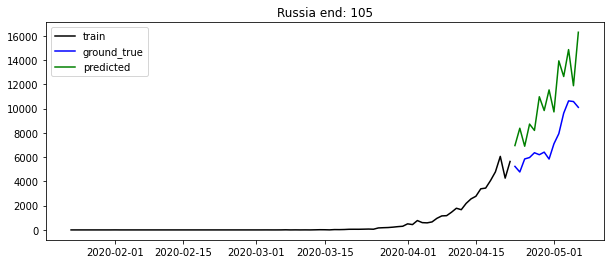

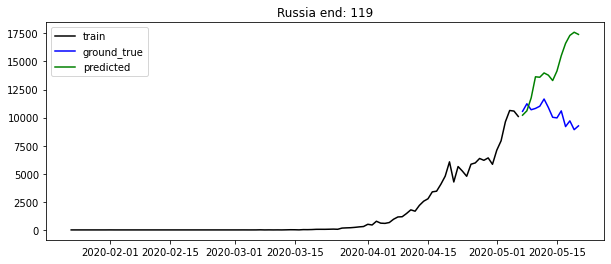

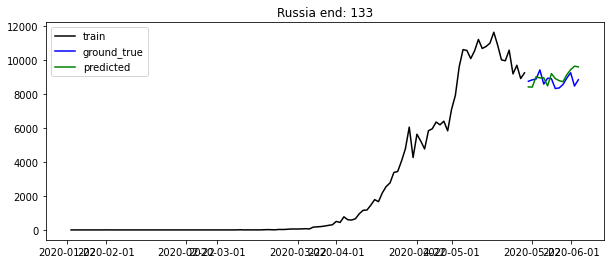

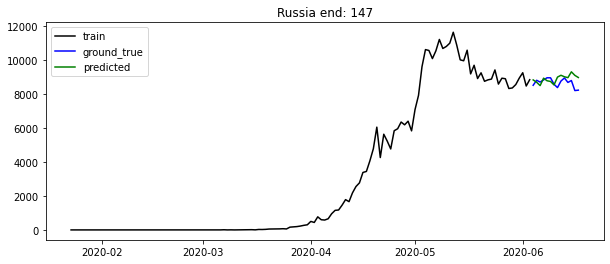

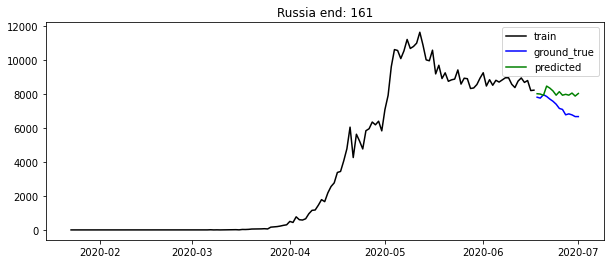

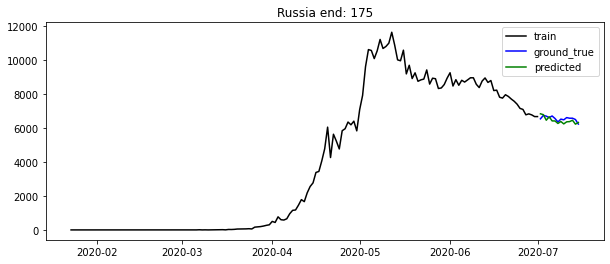

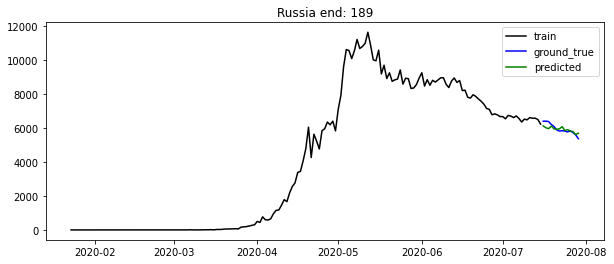

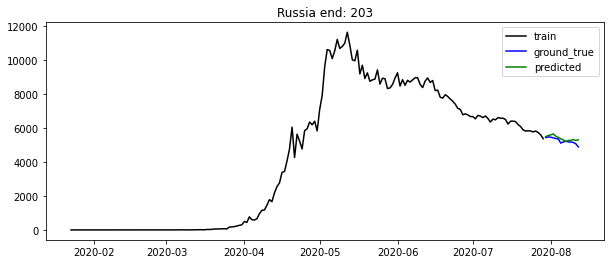

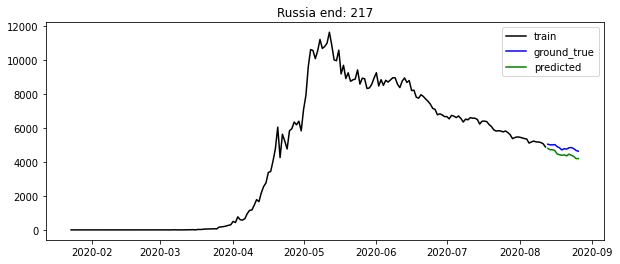

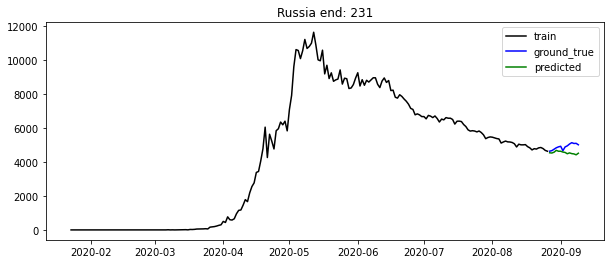

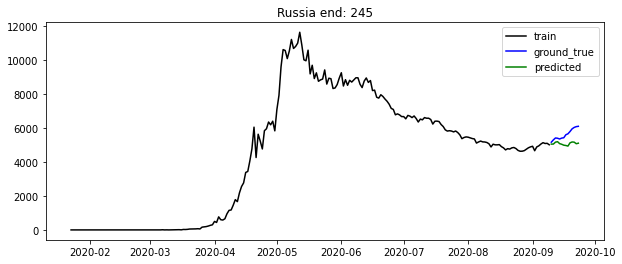

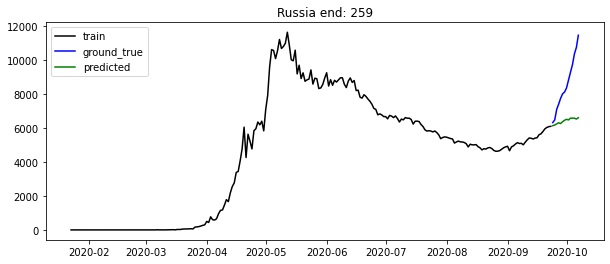

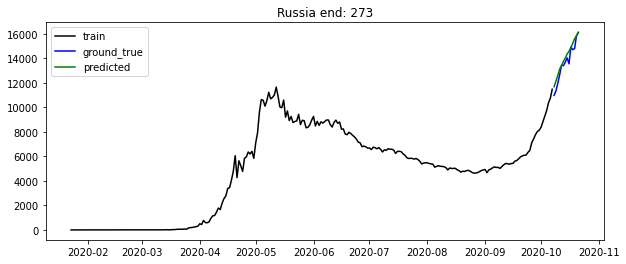

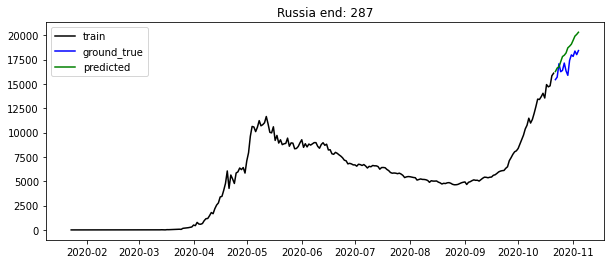

100%|██████████| 2/2 [01:57<00:00, 58.97s/it]


In [4]:
@dataclass
class SarimaxConfig:
    order = (10, 1, 7)
    seasonal_order = (0, 1, 2, 10)
    forecasting_size = 14
    
config = SarimaxConfig()
model = lambda x:\
    sm.tsa.SARIMAX(
        x,
        order=config.order,
        seasonal_order=config.seasonal_order,
)
test_all_countries(model)